# Introduction to plotnine
plotnine is an implementation of a grammar of graphics in Python, it is based on ggplot2. The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot.

## Why bother
In the previous lecture we've seen Matplotlib and although it is quite powerfull, it can also get quite finnicky to construct the plots you want. Plotnine has a very intuitive and declarative syntax for constructing plots


In [1]:
from plotnine import *
from plotnine import data
import pandas as pd

chickweight = pd.read_csv('../../data/chickweight.csv')
chickweight.describe()

,weight,time,chick,diet
count,578.000000,578.000000,578.000000,578.000000
mean,121.818339,10.717993,25.750865,2.235294
std,71.071960,6.758400,14.568795,1.162678
min,35.000000,0.000000,1.000000,1.000000
25%,63.000000,4.000000,13.000000,1.000000
50%,103.000000,10.000000,26.000000,2.000000
75%,163.750000,16.000000,38.000000,3.000000
max,373.000000,21.000000,50.000000,4.000000


For each of the pieces of code, try to guess what it does before scrolling down to see what it does. 

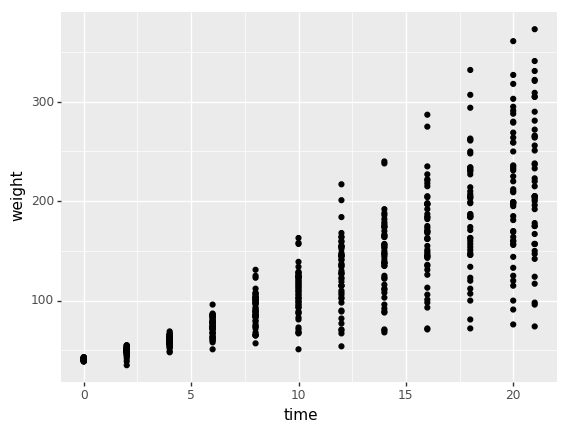

<ggplot: (-9223372036575618507)>

In [2]:
(ggplot() + 
  geom_point(data=chickweight, mapping=aes(x='time', y='weight')))

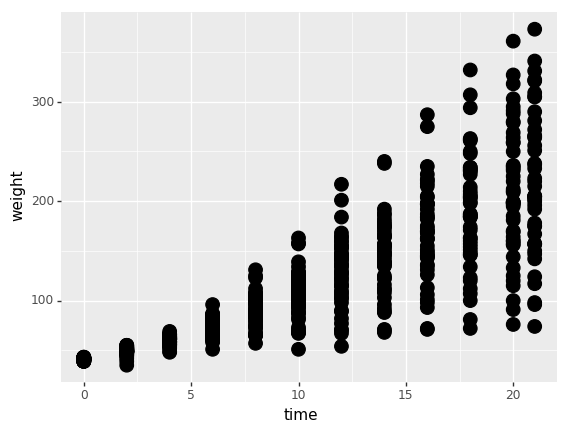

<ggplot: (279171255)>

In [3]:
(ggplot() + 
  geom_point(data=chickweight, mapping=aes(x='time', y='weight'), size=5))

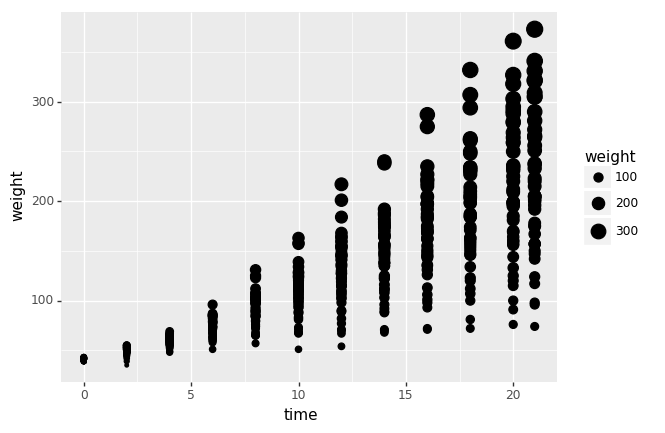

<ggplot: (278723020)>

In [4]:
(ggplot() + 
  geom_point(data=chickweight, mapping=aes(x='time', y='weight', size='weight')))

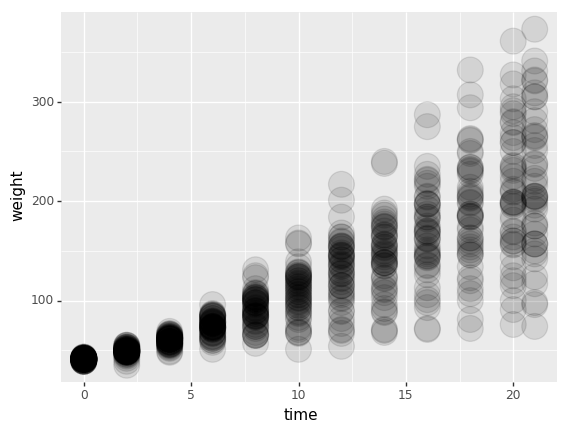

<ggplot: (278708884)>

In [5]:
(ggplot() 
 + geom_point(data=chickweight, mapping=aes(x='time', y='weight'), size=10, alpha=0.1))

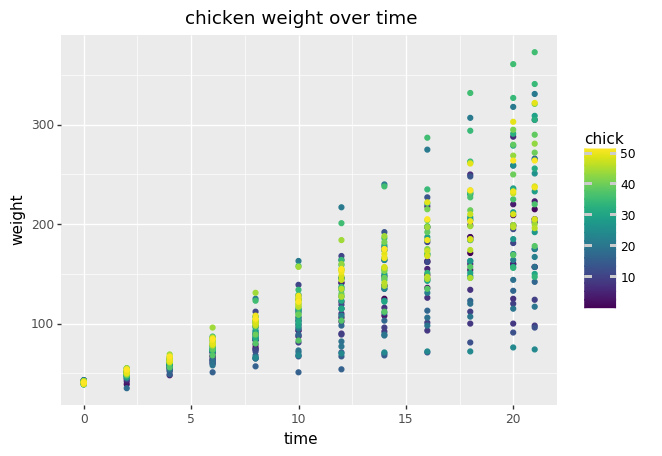

<ggplot: (278697294)>

In [6]:
(ggplot() + 
 geom_point(data=chickweight, mapping=aes(x='time', y='weight', colour='chick')) + 
 ggtitle('chicken weight over time'))

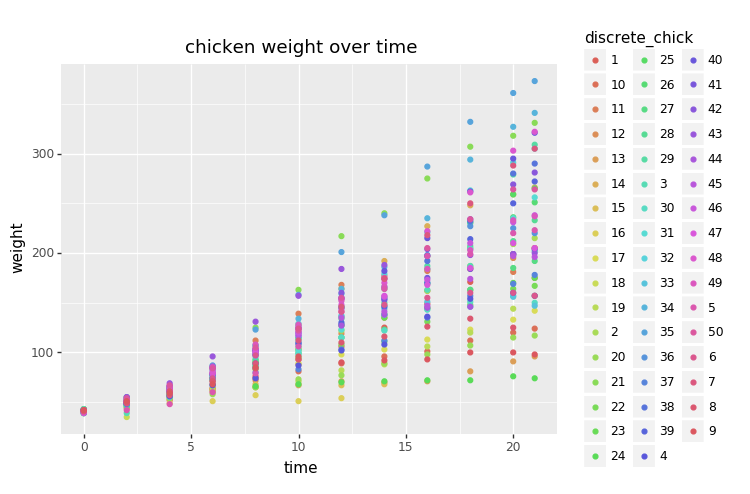

<ggplot: (-9223372036575862980)>

In [7]:
pltr = chickweight.assign(discrete_chick = lambda d: d.chick.apply(str))

(ggplot() + 
 geom_point(data=pltr, mapping=aes(x='time', y='weight', colour='discrete_chick')) + 
 ggtitle('chicken weight over time'))

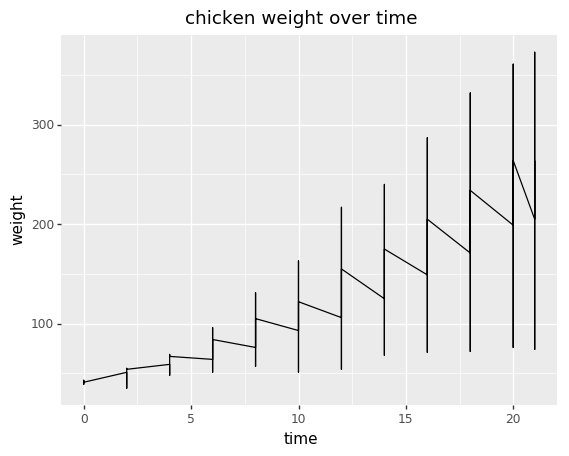

<ggplot: (278913021)>

In [8]:
(ggplot() + 
 geom_line(data=chickweight, mapping=aes(x='time', y='weight')) +
 ggtitle('chicken weight over time'))

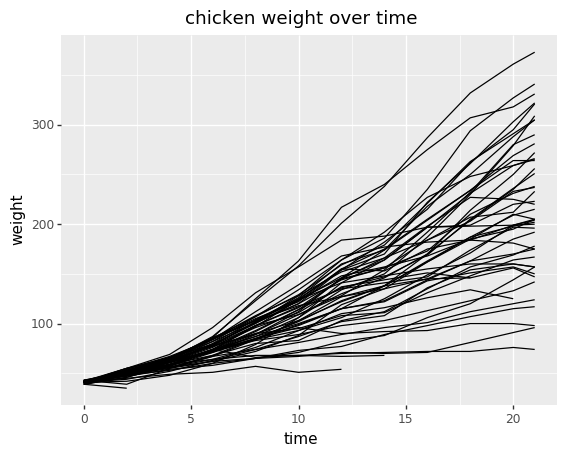

<ggplot: (278912818)>

In [9]:
(ggplot()
 + geom_line(data=chickweight, mapping=aes(x='time', y='weight', group='chick'))
 + ggtitle('chicken weight over time')
)

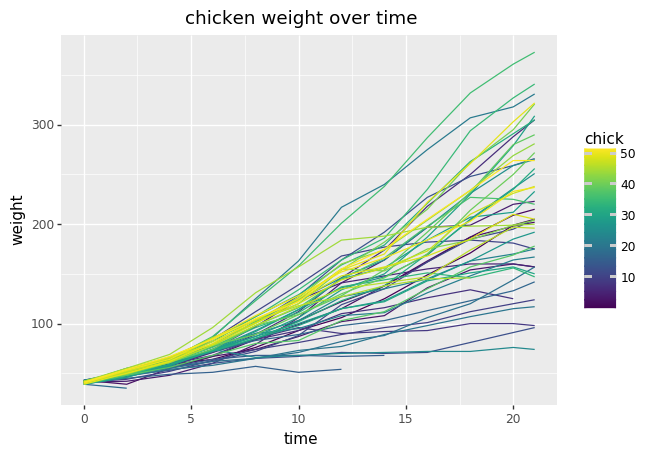

<ggplot: (-9223372036574604614)>

In [11]:
(ggplot()
 + geom_line(chickweight, mapping=aes(x='time', y='weight', colour='chick', group='chick'))
 + ggtitle('chicken weight over time')
)

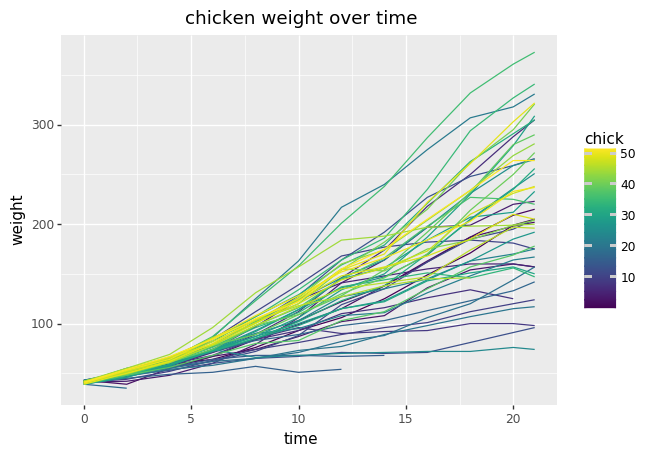

<ggplot: (280148344)>

In [12]:
(ggplot()
 + geom_line(chickweight, mapping=aes(x='time', y='weight', colour='chick', group='chick'))
 + ggtitle('chicken weight over time')
)

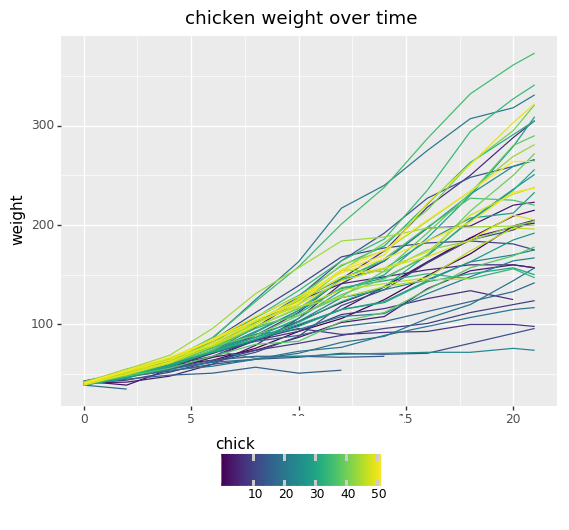

<ggplot: (279341846)>

In [13]:
(ggplot()
 + geom_line(chickweight, aes(x='time', y='weight', colour='chick', group='chick'))
 + theme(legend_position='bottom')
 + ggtitle('chicken weight over time')
)

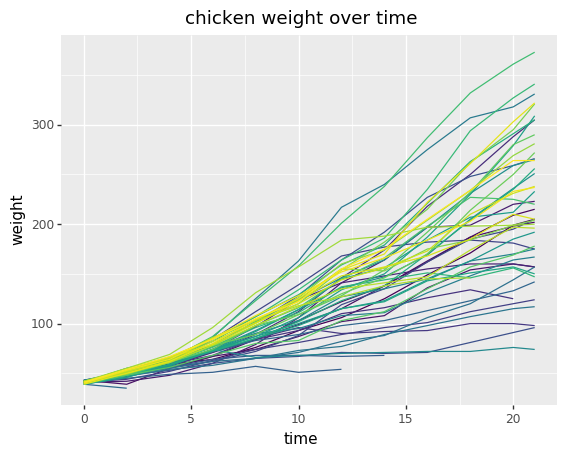

<ggplot: (-9223372036575896674)>

In [14]:
(ggplot()
 + geom_line(chickweight, aes(x='time', y='weight', colour='chick', group='chick'))
 + theme(legend_position='none')
 + ggtitle('chicken weight over time')
)

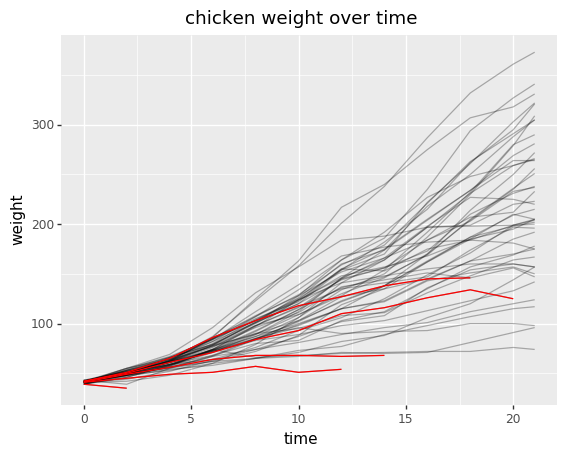

<ggplot: (302285320)>

In [49]:
premature_died_chickens = (chickweight
 .groupby('chick')
 .agg({'weight': 'count'})
 .reset_index()
 .loc[lambda d: d.weight != 12]
 ['chick'])

pltr = chickweight.loc[lambda d: d.chick.isin(premature_died_chickens)]

(ggplot()
 + geom_line(data=chickweight, mapping=aes(x='time', y='weight', group='chick'), alpha=0.3)
 + geom_line(data=pltr, mapping=aes(x='time', y='weight', group='chick'), color='red')
 + ggtitle('chicken weight over time'))

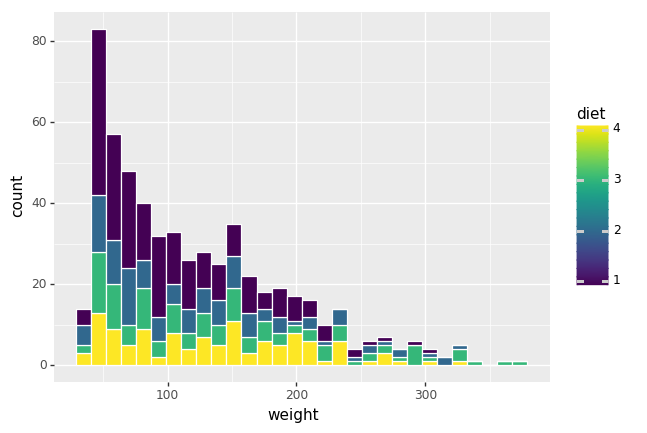

<ggplot: (294950969)>

In [51]:
(ggplot()
 + geom_histogram(data=chickweight, 
                  colour='white', 
                  bins=30, 
                  mapping=aes(x='weight', fill='diet', group='diet')))

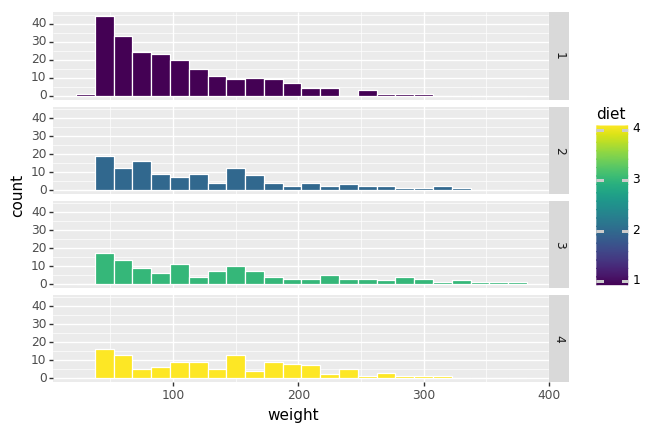

<ggplot: (300287713)>

In [54]:
(ggplot()
 + geom_histogram(data=chickweight, 
                  colour='white', 
                  binwidth=15, 
                  mapping=aes(x='weight', fill='diet'))
 + facet_grid('diet ~ .'))

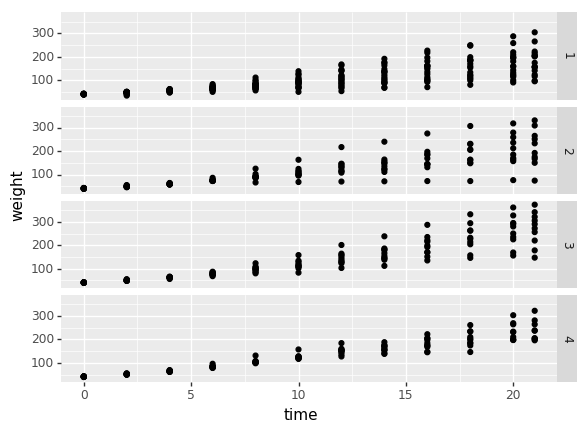

<ggplot: (-9223372036577150625)>

In [56]:
(ggplot()
 + geom_point(data=chickweight, mapping=aes(x='time', y='weight'))
 + facet_grid('diet ~ .'))

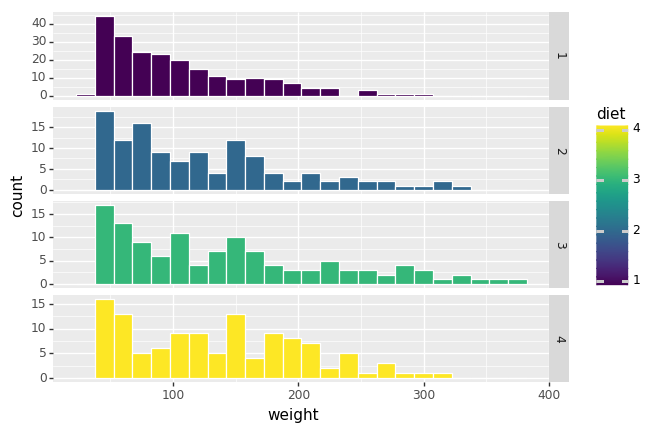

<ggplot: (-9223372036554491939)>

In [58]:
(ggplot()
 + geom_histogram(data=chickweight, 
                  colour='white', 
                  binwidth=15, 
                  mapping=aes(x='weight', fill='diet'))
 + facet_grid('diet ~ .', scales='free'))

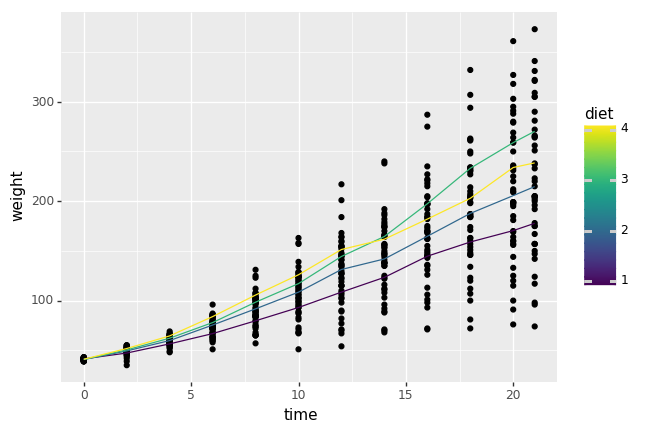

<ggplot: (300665832)>

In [69]:
agg = chickweight.groupby(['diet', 'time']).agg({'weight': 'mean'}).reset_index()

(ggplot()
 + geom_point(data=chickweight, mapping=aes(x='time', y='weight'))
 + geom_line(data=agg, mapping=aes(x='time', y='weight', group='diet', colour='diet'))
)

# Assignment 

The plot below contains a `facet_grid`. It also contains a different dataset. Try to find out how to create a `facet_wrap` and try to explain what the difference is. When would you use each of them? 

When you understand the difference between the facets, how would you improve the visualisation shown above? 

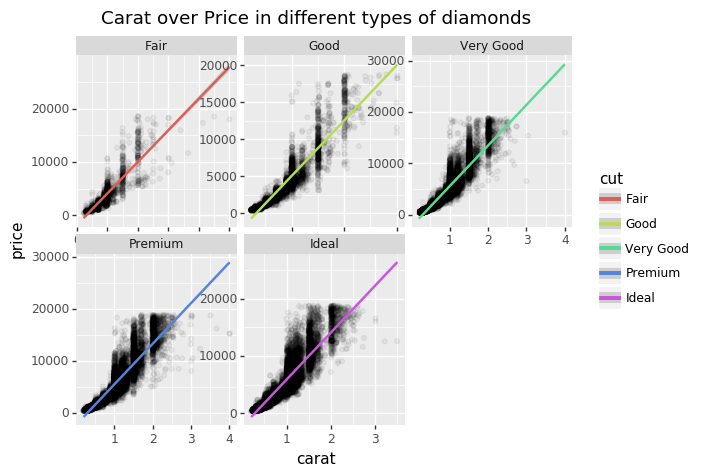

<ggplot: (-9223372036571034424)>

In [26]:
diamonds = data.diamonds

(ggplot() + 
  geom_point(aes('carat', 'price'), data=diamonds, alpha = 0.05) + 
  geom_smooth(aes('carat', 'price', colour='cut'), data=diamonds) +
  facet_wrap('~cut', scales="free") + 
  ggtitle("Carat over Price in different types of diamonds")
)